In [1]:
%matplotlib inline
import os

import numpy as np
from scipy.fftpack import fft

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.Netlist import SubCircuitFactory
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Parser import SpiceParser
from PySpice.Unit import *

# from PySpice.Physics.SemiConductor import ShockleyDiode

os.environ["LD_LIBRARY_PATH"] = "/usr/local/lib"

libraries_path = os.path.join( os.getcwd(), 'library')

print (os.path.exists(libraries_path))

spice_library = SpiceLibrary(libraries_path)

True
2017-12-05 19:52:28,113 - PySpice.Spice.Library.Library.__init__ - DEBUG - Parse /notebooks/PYsim Workshop/library/1N4148.lib
2017-12-05 19:52:28,116 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 1 ['1', '2'] ['5.827E+9'] {}
2017-12-05 19:52:28,117 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D 1 ['1', '2'] [] {'model': '1N4148'}
2017-12-05 19:52:28,118 - PySpice.Spice.Library.Library.__init__ - DEBUG - Parse /notebooks/PYsim Workshop/library/1N5822.lib
2017-12-05 19:52:28,120 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D dio ['1', '2'] [] {'model': 'legd'}
2017-12-05 19:52:28,120 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D gr ['1', '2'] [] {'model': 'grd'}
2017-12-05 19:52:28,122 - PySpice.Spice.Library.Library.__init__ - DEBUG - Parse /notebooks/PYsim Workshop/library/1N5919B.lib
2017-12-05 19:52:28,123 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D 1 ['2', '1'] [] {'model': 'MD1'}
2017-12-05 19:52:28,124

2017-12-05 19:52:28,173 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 34 ['0', '35'] ['10'] {}
2017-12-05 19:52:28,174 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 35 ['0', '36'] ['10'] {}
2017-12-05 19:52:28,175 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 10 ['37', '1', '36', '0'] ['0.3'] {}
2017-12-05 19:52:28,175 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 36 ['38', '33'] ['1K'] {}
2017-12-05 19:52:28,176 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 37 ['33', '39'] ['1K'] {}
2017-12-05 19:52:28,177 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element C 6 ['30', '34'] ['1E-12'] {}
2017-12-05 19:52:28,178 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element C 7 ['31', '35'] ['2E-12'] {}
2017-12-05 19:52:28,179 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element C 8 ['32', '36'] ['200E-12'] {}
2017-12-05 19:52:28,179 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 11 ['40', 

2017-12-05 19:52:28,236 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D 17 ['66', '63'] [] {'model': 'DD'}
2017-12-05 19:52:28,237 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D 18 ['64', '65'] [] {'model': 'DD'}
2017-12-05 19:52:28,238 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 66 ['63', '66'] ['100E6'] {}
2017-12-05 19:52:28,239 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 67 ['65', '64'] ['100E6'] {}
2017-12-05 19:52:28,240 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 68 ['66', '21'] ['1E3'] {}
2017-12-05 19:52:28,242 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 69 ['9', '65'] ['1E3'] {}
2017-12-05 19:52:28,243 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 23 ['21', '52', '21', '66'] ['1'] {}
2017-12-05 19:52:28,244 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 24 ['53', '9', '65', '9'] ['1'] {}
2017-12-05 19:52:28,245 - PySpice.Spice.Parser.Element.__init__ - D

Element R 156 ['9', '51'] ['1E8'] {}
2017-12-05 19:52:28,327 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 157 ['17', '43'] ['1E8'] {}
2017-12-05 19:52:28,330 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 158 ['16', '45'] ['1E8'] {}
2017-12-05 19:52:28,332 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R G1 ['0', '67'] ['1E9'] {}
2017-12-05 19:52:28,334 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 159 ['61', '28'] ['100'] {}
2017-12-05 19:52:28,335 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 225 ['50', '28'] ['64'] {}
2017-12-05 19:52:28,337 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 226 ['48', '56'] ['64'] {}
2017-12-05 19:52:28,339 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element I 40 ['28', '0'] ['15E-9'] {}
2017-12-05 19:52:28,341 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element I 47 ['29', '0'] ['15E-9'] {}
2017-12-05 19:52:28,342 - PySpice.Spice.Parser.Element.__init__

2017-12-05 19:52:28,425 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element V FI1 ['11', '6'] ['0'] {}
2017-12-05 19:52:28,427 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R CAP ['6', '10'] ['1'] {}
2017-12-05 19:52:28,428 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D 4 ['0', '6'] [] {'model': 'MD3'}
2017-12-05 19:52:28,431 - PySpice.Spice.Library.Library.__init__ - DEBUG - Parse /notebooks/PYsim Workshop/library/diode/schottky/1N5822.lib
2017-12-05 19:52:28,434 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D dio ['1', '2'] [] {'model': 'legd'}
2017-12-05 19:52:28,435 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D gr ['1', '2'] [] {'model': 'grd'}
2017-12-05 19:52:28,438 - PySpice.Spice.Library.Library.__init__ - DEBUG - Parse /notebooks/PYsim Workshop/library/diode/switching/1N4148.lib
2017-12-05 19:52:28,443 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 1 ['1', '2'] ['5.827E+9'] {}
2017-12-05 19:52:28,449 -

2017-12-05 19:52:28,529 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element I 8 ['0', '24'] ['0.1E-3'] {}
2017-12-05 19:52:28,530 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element I 9 ['0', '25'] ['0.1E-3'] {}
2017-12-05 19:52:28,531 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 2 ['9', '0', '2', '0'] ['1'] {}
2017-12-05 19:52:28,533 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 3 ['21', '0', '6', '0'] ['1'] {}
2017-12-05 19:52:28,534 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D 9 ['26', '0'] [] {'model': 'DVN'}
2017-12-05 19:52:28,536 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element D 10 ['27', '0'] [] {'model': 'DVN'}
2017-12-05 19:52:28,538 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element I 10 ['0', '26'] ['0.1E-3'] {}
2017-12-05 19:52:28,540 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element I 11 ['0', '27'] ['0.1E-3'] {}
2017-12-05 19:52:28,541 - PySpice.Spice.Parser.Element.__init__ - DEBUG 

2017-12-05 19:52:28,618 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 18 ['38', '0', '3', '0'] ['1'] {}
2017-12-05 19:52:28,620 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element M 23 ['58', '58', '21', '21'] [] {'L': '6U', 'W': '500U', 'model': 'PIN'}
2017-12-05 19:52:28,621 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element V 21 ['57', '11'] ['0'] {}
2017-12-05 19:52:28,623 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 59 ['23', '44'] ['20'] {}
2017-12-05 19:52:28,624 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 60 ['42', '23'] ['20'] {}
2017-12-05 19:52:28,625 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element J 1 ['59', '29', '59'] [] {'model': 'JNC'}
2017-12-05 19:52:28,627 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element J 2 ['59', '28', '59'] [] {'model': 'JNC'}
2017-12-05 19:52:28,629 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element J 3 ['28', '60', '28'] [] {'model': 'JNC'}
2017-12-05 19:

2017-12-05 19:52:28,697 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element V 51 ['77', '9'] ['1'] {}
2017-12-05 19:52:28,698 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element M 45 ['78', '78', '21', '21'] [] {'L': '6U', 'W': '60U', 'model': 'PEN'}
2017-12-05 19:52:28,700 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element M 46 ['5', '78', '21', '21'] [] {'L': '6U', 'W': '60U', 'model': 'PEN'}
2017-12-05 19:52:28,702 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element I 20 ['78', '9'] ['0.2E-6'] {}
2017-12-05 19:52:28,703 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element C 26 ['5', '0'] ['1E-12'] {}
2017-12-05 19:52:28,706 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 50 ['67', '0', '79', '9'] ['1'] {}
2017-12-05 19:52:28,707 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element V 52 ['75', '79'] ['1.111E-6'] {}
2017-12-05 19:52:28,708 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element R 133 ['9', '79'] ['1E12'] {}
2017

2017-12-05 19:52:28,774 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 98 ['21', '14', '6', '16'] ['0.9'] {}
2017-12-05 19:52:28,775 - PySpice.Spice.Parser.Element.__init__ - DEBUG - 
Element E 99 ['13', '9', '17', '2'] ['3'] {}
2017-12-05 19:52:28,777 - PySpice.Spice.Library.Library.__init__ - DEBUG - Parse /notebooks/PYsim Workshop/library/transistor/2N2222A.lib


In [2]:
class CMOSInverter(SubCircuitFactory):

    __name__ = 'CMOSInverter'
    __nodes__ = ('input', 'output', 'vdd', 'vss')

    ##############################################

    def __init__(self):

        super().__init__()
        
        self.MOSFET('p', 'output', 'input', 'vdd', 'vdd', model='pch', w='20u', l='0.18u')
        self.MOSFET('n', 'output', 'input', 'vss', 'vss', model='nch', w='20u', l='0.18u')


In [3]:
def ringOSC_sim(stages, sim_time, steps, plot_time=0, plot_fft=0):
    circuit = Circuit('Ring CMOS Oscillator')
    
    # circuit.PieceWiseLinear('vdd', 'vdd', circuit.gnd, 0, 1.2, 1e-9, 1.2)
    circuit.V('dd', 'vdd', circuit.gnd, 1.2@u_V)

    circuit.R('dd',  'vdd', 'vdd_ana', milli(70))
    circuit.R('gnd', 'gnd_ana', circuit.gnd, milli(70))
    
    #CMOS Models
    circuit.model(name='pch', modele_type='pmos', version=4.7, level=54, lmin='0.1u', lmax='500u', wmin='0.1u', wmax='100u')
    circuit.model(name='nch', modele_type='nmos', version=4.7, level=54, lmin='0.1u', lmax='500u', wmin='0.1u', wmax='100u')
    
    circuit.subcircuit(CMOSInverter())
    
    for i in range(1,stages+1):
        if i == 1:
            in_node = 'net' + str(stages)
        else: 
            in_node = 'net' + str(i-1)
        out_node  = 'net' + str(i)
        
        circuit.X('inv'+ str(i), 'CMOSInverter', in_node, out_node, 'vdd_ana', 'gnd_ana')
        
#         circuit.MOSFET('p' + str(i), out_node, in_node, 'vdd_ana', 'vdd_ana', model='pch', w='100u', l='0.28u')
#         circuit.MOSFET('n' + str(i), out_node, in_node, 'gnd_ana', 'gnd_ana', model='nch', w='100u', l='0.18u')

    circuit.X('inv_out', 'CMOSInverter', 'net' + str(stages), 'out', 'vdd', 'gnd')
    
    #circuit.MOSFET('pout', 'out', 'net' + str(stages), 'vdd', 'vdd', model='pch', w='20u', l='0.18u')
    #circuit.MOSFET('nout', 'out', 'net' + str(stages), circuit.gnd, circuit.gnd, model='nch', w='20u', l='0.18u')

    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    
    # Kickstart simulation by defining initial value of a net:
    simulator.initial_condition(net1=0) 
    
    step_time=sim_time/steps*1@u_s
    end_time=sim_time*1@u_s
    
    print(step_time, end_time)
    
    analysis = simulator.transient(step_time=step_time, end_time=end_time)
    
    ########################################################################################################################
    ## FFT: 
    N = int(steps) # number of sample points
    dt = sim_time / steps # sample spacing

    yf = fft(analysis['out'])
    tf = np.linspace(.0, 1./(2.*dt), N//2)
    spectrum = 2./N * np.abs(yf[0:N//2])

    r_f = tf[spectrum[1:].argmax()+1]
    r_t = 1/r_f

    print("frequency = {:f}GHz, {:f}ns".format(r_f/1e9, r_t*1e9))
    
    if(plot_time):
        figure = plt.figure(1, (20, 10))

        axe = plt.subplot(111)
        axe.set_title('Ring oszillator')
        axe.set_xlabel('Time [s]')
        axe.set_ylabel('Voltage [V]')
        axe.grid()
        plot(analysis['out'], axis=axe)
        plot(analysis['net'+str(int(stages/2))], axis=axe)
        axe.legend(['out'] + ['net' + str(i) for i in range(1, stages+1)], loc=(.2,.8))

        plt.tight_layout()
        plt.show()
    
    if(plot_fft):
        figure1 = plt.figure(1, (20, 10))
        plt.plot(tf[1:(spectrum[1:].argmax()+1)*30], spectrum[1:(spectrum[1:].argmax()+1)*30], 'o-')
        plt.grid()
        #for frequency in frequency1, frequency2:
        plt.axvline(x=r_f, color='red')
        plt.axvline(x=3*r_f, color='red')
        plt.axvline(x=5*r_f, color='red')
        plt.title('Spectrum')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude')
    
    return r_f

2017-12-05 19:52:44,829 - PySpice.Spice.NgSpice.Shared.NgSpiceShared.new_instance - INFO - New instance for id 0
2017-12-05 19:52:44,970 - PySpice.Spice.NgSpice.Shared.NgSpiceShared.exec_command - DEBUG - Execute command: set nomoremode
2e-12 s 2e-07 s
2017-12-05 19:52:44,973 - PySpice.Spice.Simulation.NgSpiceSharedCircuitSimulator._run - DEBUG - desk
.title Ring CMOS Oscillator
.subckt CMOSInverter input output vdd vss 
Mp output input vdd vdd pch l=0.18u w=20u
Mn output input vss vss nch l=0.18u w=20u
.ends CMOSInverter
Vdd vdd 0 1.2V
Rdd vdd vdd_ana 70m
Rgnd gnd_ana 0 70m
Xinv1 net3 net1 vdd_ana gnd_ana CMOSInverter
Xinv2 net1 net2 vdd_ana gnd_ana CMOSInverter
Xinv3 net2 net3 vdd_ana gnd_ana CMOSInverter
Xinv_out net3 out vdd gnd CMOSInverter
.model pch pmos (version=4.7 level=54 lmin=0.1u lmax=500u wmin=0.1u wmax=100u)
.model nch nmos (version=4.7 level=54 lmin=0.1u lmax=500u wmin=0.1u wmax=100u)
.options TEMP = 25°C
.options TNOM = 25°C
.ic V(net1)=0
.tran 2e-12s 2e-07s 0s
.end

2

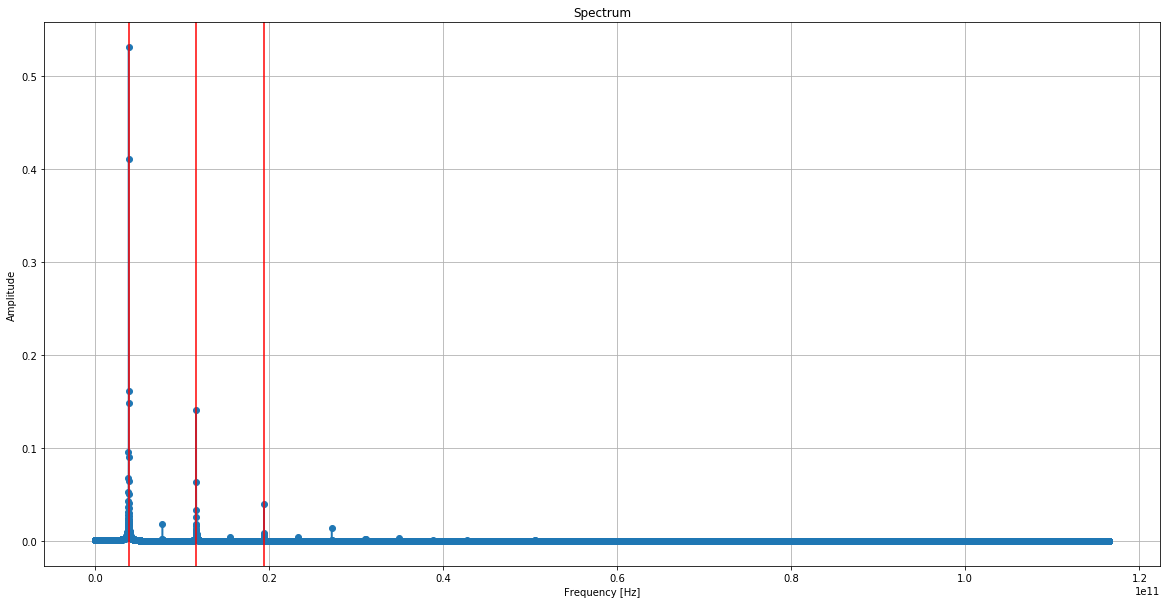

In [4]:
f_r3 = ringOSC_sim(3, 20e-8, 1e5, plot_time=0, plot_fft=1)
f_r1=f_r3*3
t_r1=1/f_r1

Simulation time = 1.286976ns
1.2869755469755468e-14 s 1.286975546975547e-09 s
2017-12-05 19:57:21,928 - PySpice.Spice.Simulation.NgSpiceSharedCircuitSimulator._run - DEBUG - desk
.title Ring CMOS Oscillator
.subckt CMOSInverter input output vdd vss 
Mp output input vdd vdd pch l=0.18u w=20u
Mn output input vss vss nch l=0.18u w=20u
.ends CMOSInverter
Vdd vdd 0 1.2V
Rdd vdd vdd_ana 70m
Rgnd gnd_ana 0 70m
Xinv1 net3 net1 vdd_ana gnd_ana CMOSInverter
Xinv2 net1 net2 vdd_ana gnd_ana CMOSInverter
Xinv3 net2 net3 vdd_ana gnd_ana CMOSInverter
Xinv_out net3 out vdd gnd CMOSInverter
.model pch pmos (version=4.7 level=54 lmin=0.1u lmax=500u wmin=0.1u wmax=100u)
.model nch nmos (version=4.7 level=54 lmin=0.1u lmax=500u wmin=0.1u wmax=100u)
.options TEMP = 25°C
.options TNOM = 25°C
.ic V(net1)=0
.tran 1.2869755469755468e-14s 1.286975546975547e-09s 0s
.end

2017-12-05 19:57:21,929 - PySpice.Spice.NgSpice.Shared.NgSpiceShared.exec_command - DEBUG - Execute command: destroy all
2017-12-05 19:57:25,94

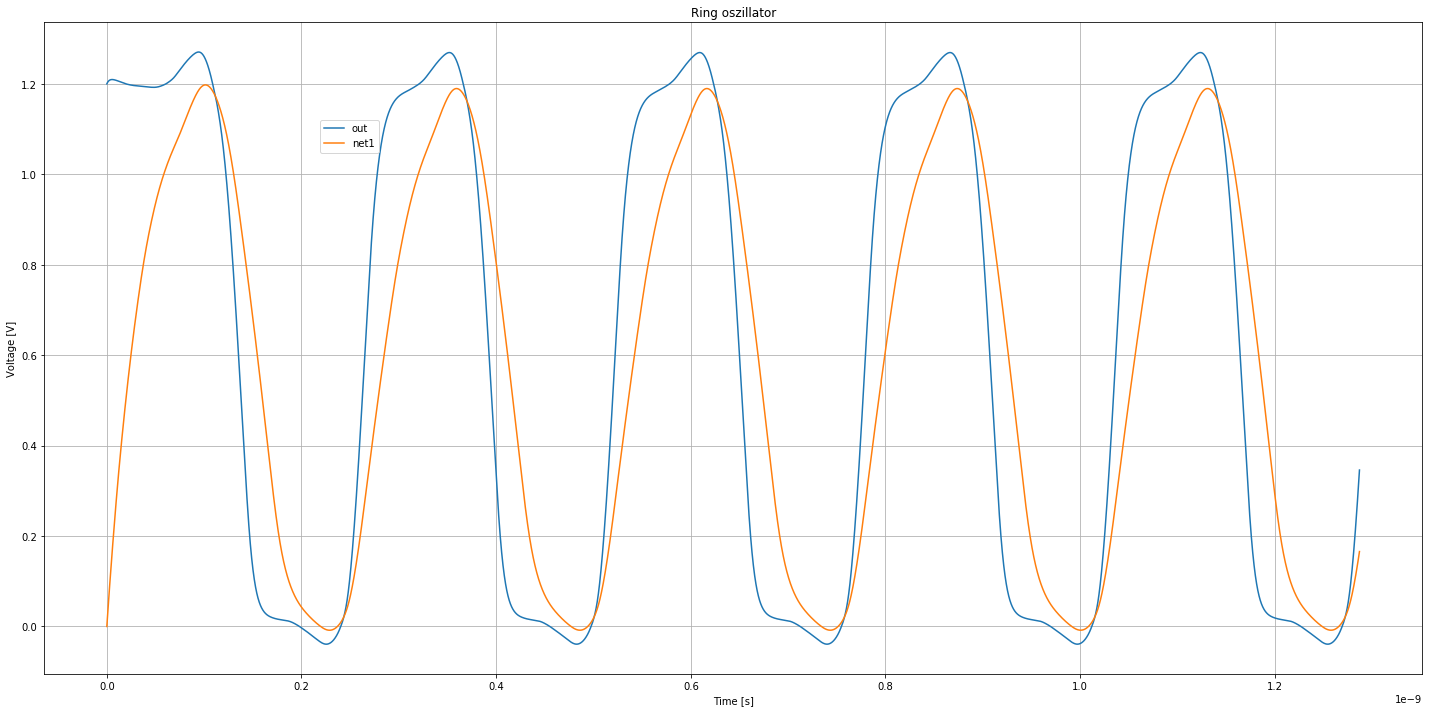

3885155404.6621246

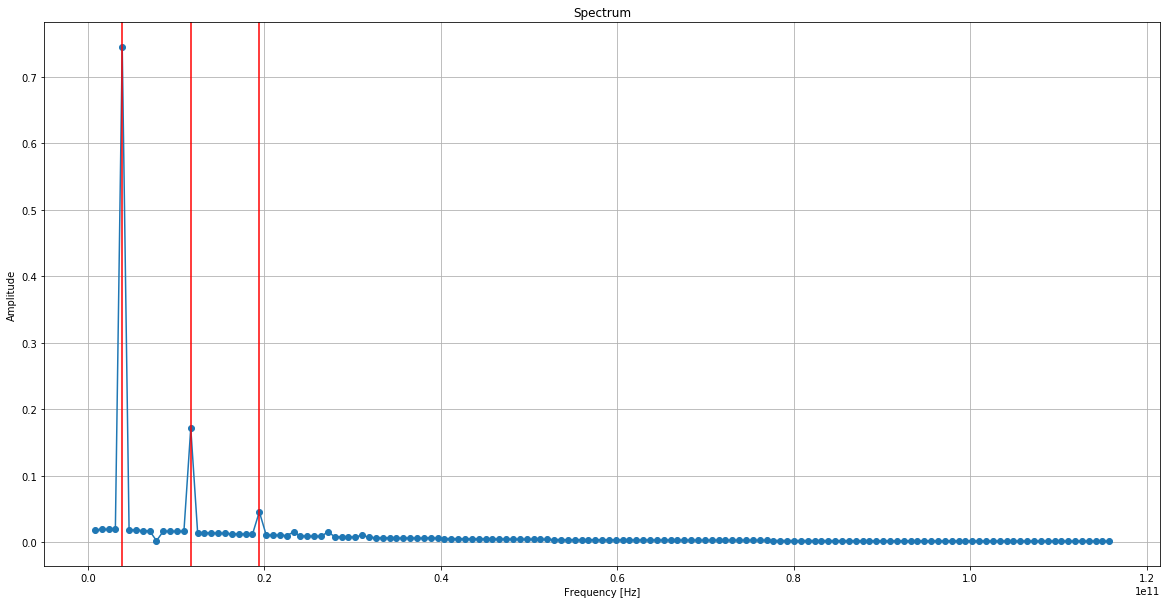

In [6]:

stages=3
t_sim=5*t_r1*stages
print("Simulation time = {:f}ns".format(t_sim*1e9))
ringOSC_sim(stages, t_sim, 1e5, plot_time=1, plot_fft=1)

Stages = 5; Simulation time = 2.144959ns
1.9499629499629497e-13 s 2.1449592449592447e-09 s
2017-12-05 19:54:34,787 - PySpice.Spice.Simulation.NgSpiceSharedCircuitSimulator._run - DEBUG - desk
.title Ring CMOS Oscillator
.subckt CMOSInverter input output vdd vss 
Mp output input vdd vdd pch l=0.18u w=20u
Mn output input vss vss nch l=0.18u w=20u
.ends CMOSInverter
Vdd vdd 0 1.2V
Rdd vdd vdd_ana 70m
Rgnd gnd_ana 0 70m
Xinv1 net5 net1 vdd_ana gnd_ana CMOSInverter
Xinv2 net1 net2 vdd_ana gnd_ana CMOSInverter
Xinv3 net2 net3 vdd_ana gnd_ana CMOSInverter
Xinv4 net3 net4 vdd_ana gnd_ana CMOSInverter
Xinv5 net4 net5 vdd_ana gnd_ana CMOSInverter
Xinv_out net5 out vdd gnd CMOSInverter
.model pch pmos (version=4.7 level=54 lmin=0.1u lmax=500u wmin=0.1u wmax=100u)
.model nch nmos (version=4.7 level=54 lmin=0.1u lmax=500u wmin=0.1u wmax=100u)
.options TEMP = 25°C
.options TNOM = 25°C
.ic V(net1)=0
.tran 1.9499629499629497e-13s 2.1449592449592447e-09s 0s
.end

2017-12-05 19:54:34,790 - PySpice.Spice

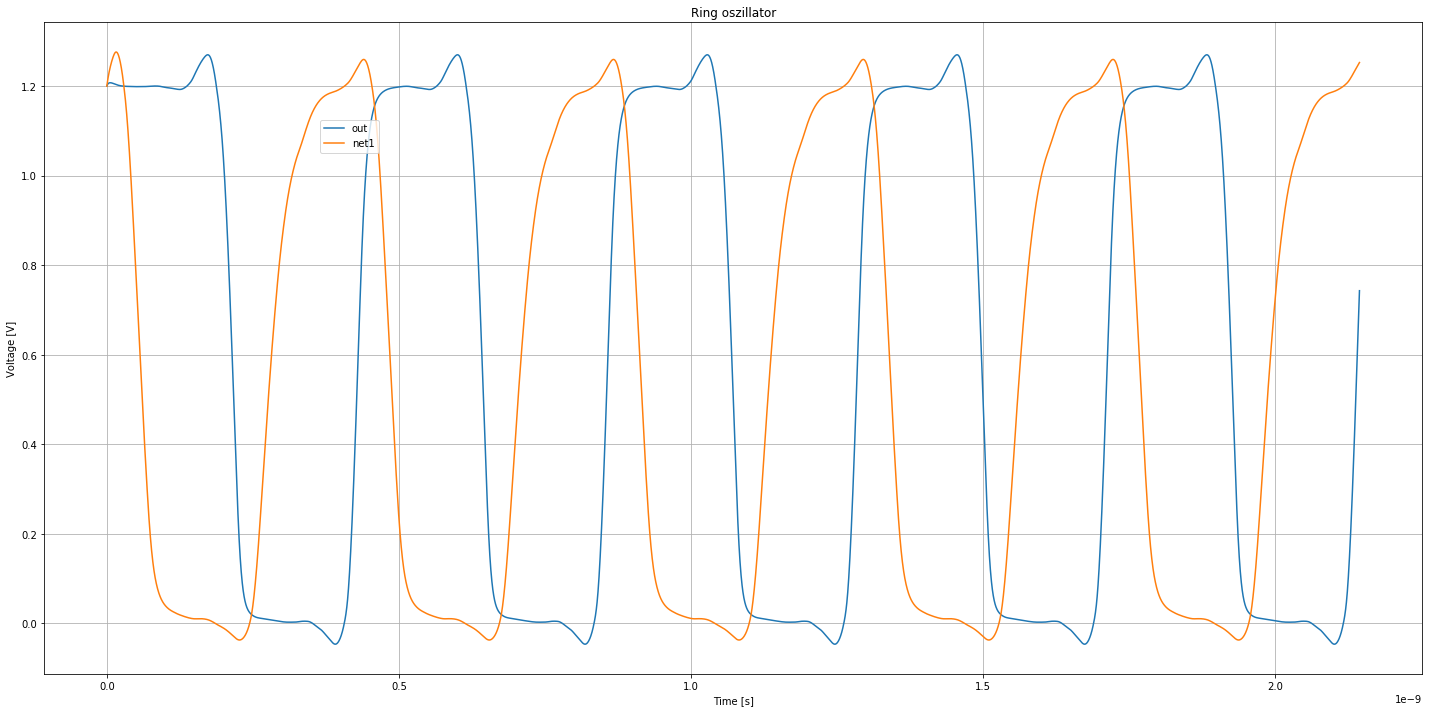

Stages = 13; Simulation time = 5.576894ns
5.06990366990367e-13 s 5.5768940368940364e-09 s
2017-12-05 19:54:35,960 - PySpice.Spice.Simulation.NgSpiceSharedCircuitSimulator._run - DEBUG - desk
.title Ring CMOS Oscillator
.subckt CMOSInverter input output vdd vss 
Mp output input vdd vdd pch l=0.18u w=20u
Mn output input vss vss nch l=0.18u w=20u
.ends CMOSInverter
Vdd vdd 0 1.2V
Rdd vdd vdd_ana 70m
Rgnd gnd_ana 0 70m
Xinv1 net13 net1 vdd_ana gnd_ana CMOSInverter
Xinv2 net1 net2 vdd_ana gnd_ana CMOSInverter
Xinv3 net2 net3 vdd_ana gnd_ana CMOSInverter
Xinv4 net3 net4 vdd_ana gnd_ana CMOSInverter
Xinv5 net4 net5 vdd_ana gnd_ana CMOSInverter
Xinv6 net5 net6 vdd_ana gnd_ana CMOSInverter
Xinv7 net6 net7 vdd_ana gnd_ana CMOSInverter
Xinv8 net7 net8 vdd_ana gnd_ana CMOSInverter
Xinv9 net8 net9 vdd_ana gnd_ana CMOSInverter
Xinv10 net9 net10 vdd_ana gnd_ana CMOSInverter
Xinv11 net10 net11 vdd_ana gnd_ana CMOSInverter
Xinv12 net11 net12 vdd_ana gnd_ana CMOSInverter
Xinv13 net12 net13 vdd_ana gnd_a

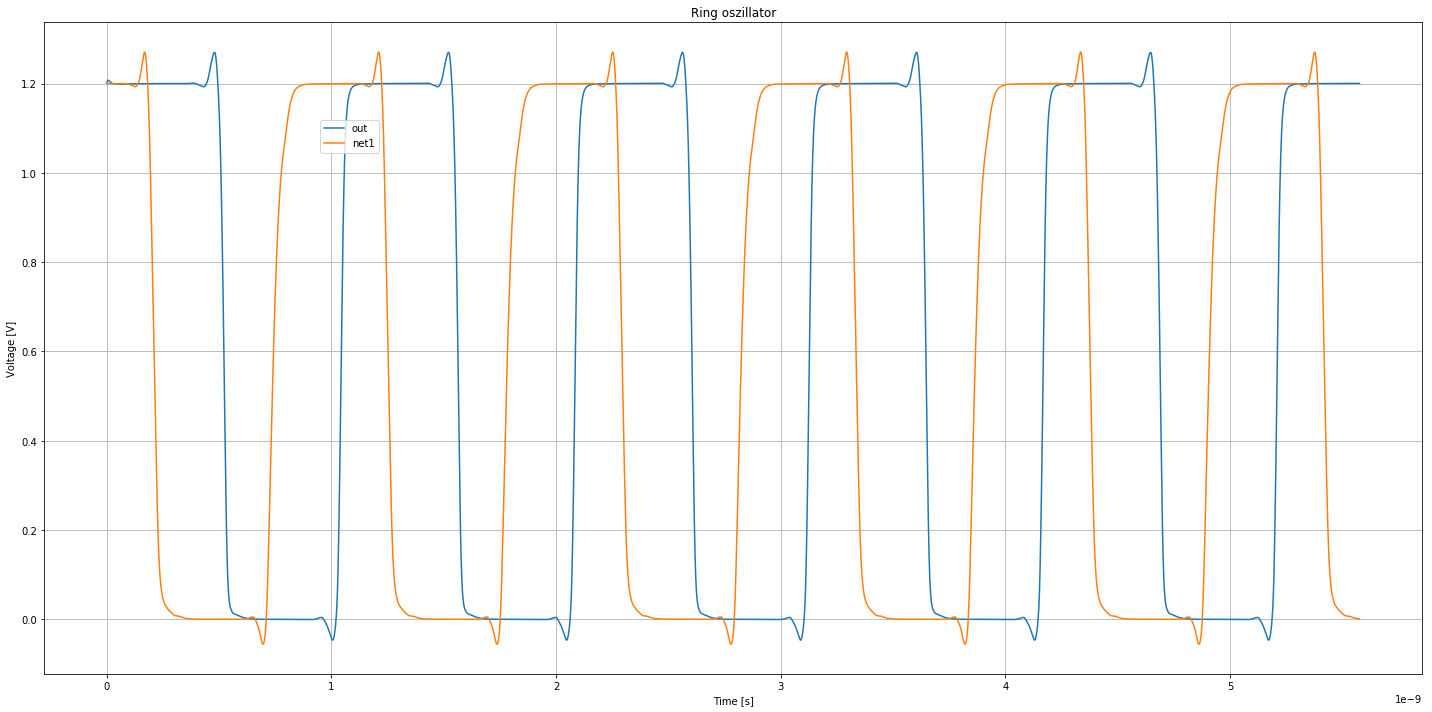

Stages = 21; Simulation time = 9.008829ns
8.18984438984439e-13 s 9.008828828828829e-09 s
2017-12-05 19:54:37,709 - PySpice.Spice.Simulation.NgSpiceSharedCircuitSimulator._run - DEBUG - desk
.title Ring CMOS Oscillator
.subckt CMOSInverter input output vdd vss 
Mp output input vdd vdd pch l=0.18u w=20u
Mn output input vss vss nch l=0.18u w=20u
.ends CMOSInverter
Vdd vdd 0 1.2V
Rdd vdd vdd_ana 70m
Rgnd gnd_ana 0 70m
Xinv1 net21 net1 vdd_ana gnd_ana CMOSInverter
Xinv2 net1 net2 vdd_ana gnd_ana CMOSInverter
Xinv3 net2 net3 vdd_ana gnd_ana CMOSInverter
Xinv4 net3 net4 vdd_ana gnd_ana CMOSInverter
Xinv5 net4 net5 vdd_ana gnd_ana CMOSInverter
Xinv6 net5 net6 vdd_ana gnd_ana CMOSInverter
Xinv7 net6 net7 vdd_ana gnd_ana CMOSInverter
Xinv8 net7 net8 vdd_ana gnd_ana CMOSInverter
Xinv9 net8 net9 vdd_ana gnd_ana CMOSInverter
Xinv10 net9 net10 vdd_ana gnd_ana CMOSInverter
Xinv11 net10 net11 vdd_ana gnd_ana CMOSInverter
Xinv12 net11 net12 vdd_ana gnd_ana CMOSInverter
Xinv13 net12 net13 vdd_ana gnd_an

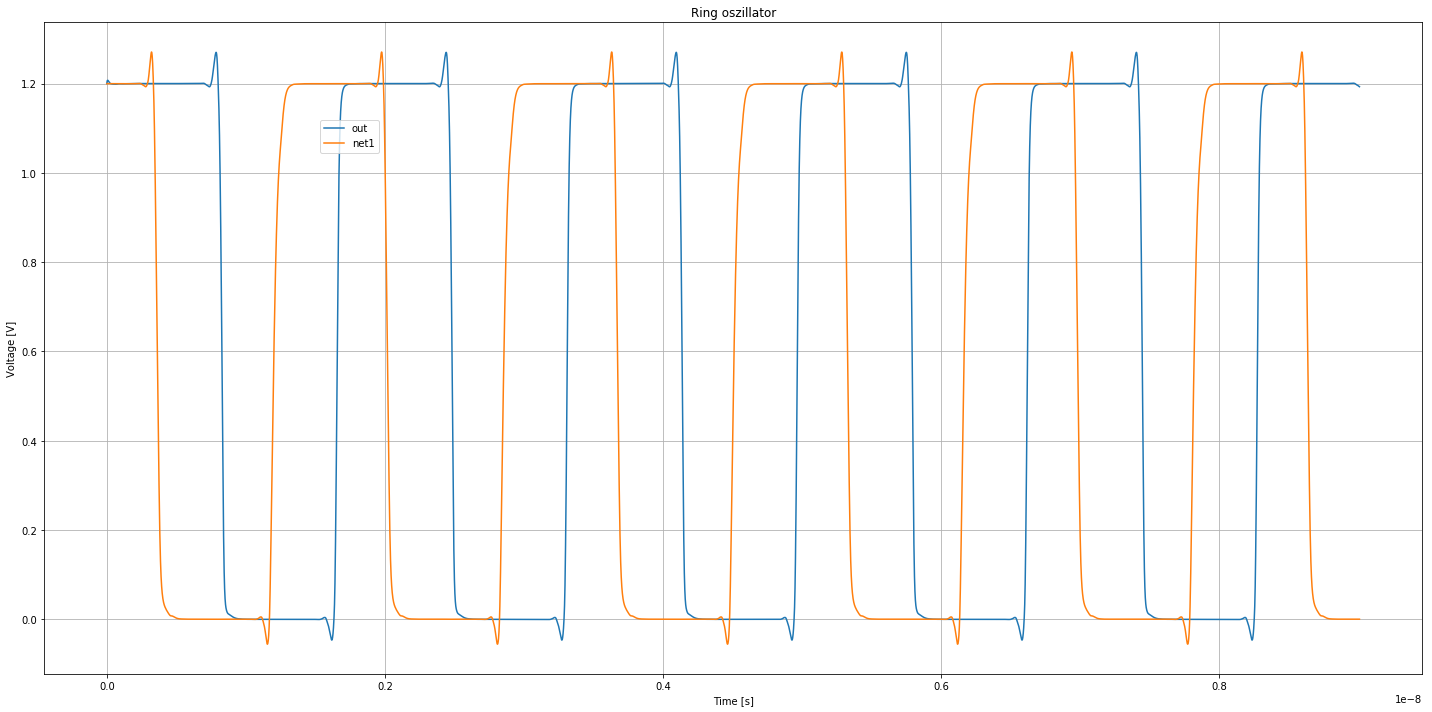

In [5]:
for i in range(5,25,8):
    stages=i
    t_sim=5*t_r1*stages
    print("Stages = {:d}; Simulation time = {:f}ns".format(stages, t_sim*1e9))
    ringOSC_sim(stages, t_sim, 1.1e4, plot_time=1)

In [ ]:
circuit = Circuit('Ring CMOS Oscillator')



# circuit.PieceWiseLinear('vdd', 'vdd', circuit.gnd, 0, 1.2, 1e-9, 1.2)
circuit.V('dd', 'vdd', circuit.gnd, 1.2@u_V)

circuit.R('dd',  'vdd', 'vdd_ana', milli(70))
circuit.R('gnd', 'gnd_ana', circuit.gnd, milli(70))

circuit.model(name='pch', modele_type='pmos', version=4.7, level=54, lmin='0.1u', lmax='500u', wmin='0.1u', wmax='100u')
circuit.model(name='nch', modele_type='nmos', version=4.7, level=54, lmin='0.1u', lmax='500u', wmin='0.1u', wmax='100u')

for i in range(1,stages+1):
    if i == 1:
        in_node = 'net' + str(stages)
    else: 
        in_node = 'net' + str(i-1)
    out_node  = 'net' + str(i)
    circuit.MOSFET('p' + str(i), out_node, in_node, 'vdd_ana', 'vdd_ana', model='pch', w='100u', l='0.28u')
    circuit.MOSFET('n' + str(i), out_node, in_node, 'gnd_ana', 'gnd_ana', model='nch', w='100u', l='0.18u')
    
circuit.MOSFET('pout', 'out', 'net' + str(stages), 'vdd', 'vdd', model='pch', w='20u', l='0.18u')
circuit.MOSFET('nout', 'out', 'net' + str(stages), circuit.gnd, circuit.gnd, model='nch', w='20u', l='0.18u')

source = str(circuit)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
simulator.initial_condition(net1=0) 
analysis = simulator.transient(step_time=sim_time/steps*1@u_s, end_time=sim_time*1@u_s)

########################################################################################################################
## FFT: 
N = steps # number of sample points
dt = sim_time / steps # sample spacing

yf = fft(analysis['out'])
tf = np.linspace(.0, 1./(2.*dt), N//2)
spectrum = 2./N * np.abs(yf[0:N//2])

r_f = tf[spectrum[1:].argmax()+1]
r_t = 1/r_f

print("frequency = {:f}GHz, {:f}ns".format(r_f/1e9, r_t*1e9))


In [ ]:
figure = plt.figure(1, (20, 10))

axe = plt.subplot(111)
axe.set_title('Ring oszillator')
axe.set_xlabel('Time [s]')
axe.set_ylabel('Voltage [V]')
axe.grid()
# Fixme: axis vs axe ...
plot(analysis['out'], axis=axe)
plot(analysis['net'+str(int(stages/2))], axis=axe)
# for i in range(1, stages+1):
#     y = analysis['net'+str(i)]
#     plot(y, axis=axe)
# axe.axhline(-multiplier*source.amplitude)
#axe.set_ylim(float(-multiplier*1.1*source.amplitude), float(1.1*source.amplitude))
#axe.set_xlim(0,5e-7)
axe.legend(['out'] + ['net' + str(i) for i in range(1, stages+1)], loc=(.2,.8))

plt.tight_layout()
plt.show()

In [ ]:
print(r_f)
figure1 = plt.figure(1, (20, 10))
plt.plot(tf[1:(spectrum[1:].argmax()+1)*30], spectrum[1:(spectrum[1:].argmax()+1)*30], 'o-')
plt.grid()
#for frequency in frequency1, frequency2:
plt.axvline(x=r_f, color='red')
plt.axvline(x=3*r_f, color='red')
plt.axvline(x=5*r_f, color='red')
plt.title('Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
1